# 정형 데이터마이닝

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

1.&nbsp; cabin, embarked변수의 값 중 ""로 처린된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오.<br>
또, 수치형 변수가 NA인 값을 중앙값을 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고 age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

In [ ]:
data_path = '/hdd/data/adp_data/titanic.csv'
df = pd.read_csv(data_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [4]:
df['cabin'] = df['cabin'].replace("", pd.NA)
df['embarked'] = df['embarked'].replace("", pd.NA)

char_cols = ['name', 'sex', 'ticket', 'cabin']
factor_cols = ['embarked']

df[char_cols] = df[char_cols].astype(str)
df[factor_cols] = df[factor_cols].astype(str)

num_cols = ['age', 'fare']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in factor_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = list(range(len(bins) - 1))
df['age_1'] = pd.cut(df['age'], bins = bins, labels = labels, right = False)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,2


2.&nbsp; 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오.(set.seed(12345)를 실행한 후 데이터를 분할하시오.) 또 train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.

In [6]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 12345)

target = 'survived'
features = ['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']

encoder = LabelEncoder()
train_df['sex'] = encoder.fit_transform(train_df['sex'])
test_df['sex'] = encoder.transform(test_df['sex'])

train_df['embarked'] = encoder.fit_transform(train_df['embarked'])
test_df['embarked'] = encoder.transform(test_df['embarked'])

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

In [7]:
log_model = LogisticRegression(max_iter = 100)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print('Logistic Regression Accuracy: ', accuracy_score(y_test, log_preds))

Logistic Regression Accuracy:  0.7735368956743003


In [8]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 12345)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print('Random Forest Accuracy: ', accuracy_score(y_test, rf_preds))

Random Forest Accuracy:  0.7480916030534351


In [9]:
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 12345)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print('Gradient Boosting Accuracy: ', accuracy_score(y_test, gb_preds))

Gradient Boosting Accuracy:  0.7888040712468194


3.&nbsp; 생성된 3개의 부류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또, ROC curve를 그리고 AUC값을 산출하시오.

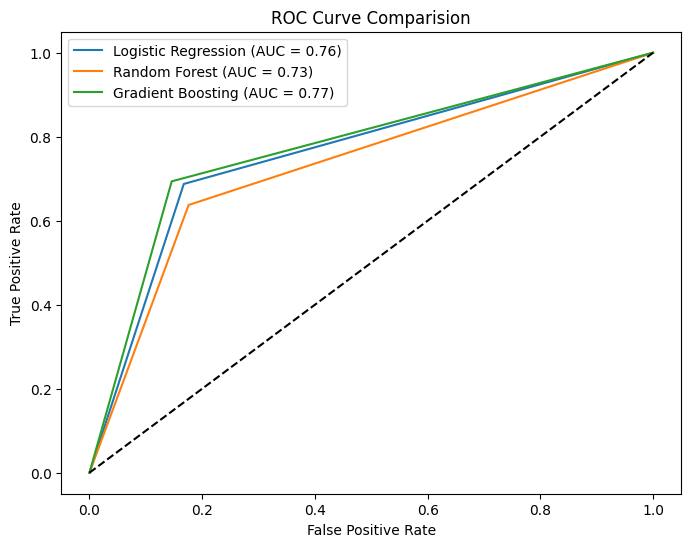

In [12]:
model_preds = zip(
    ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    [log_preds, rf_preds, gb_preds]
)
plt.figure(figsize = (8, 6))
for model_name, y_prods in model_preds:
    fpr, tpr, _ = roc_curve(y_test, y_prods)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'{model_name} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparision')
plt.legend()
plt.show()